In [3]:
# import packages
import sys
sys.path.append('../')
import pickle
import pandas as pd
import re
import seaborn as sns

In [4]:
#load labelled data (generated in file 2.preprocessing_en)
data = pd.read_pickle('data_n_models/de_df_labelled.pkl')

In [5]:
data.head()

,index,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,favorite_count,in_reply_to_status_id,keyword,language,clean,clean_vader,compound,lem,lemma
0,1,1079317443523297280,12303,Boulder667,viel spaß damit eine wahl zu gewinnen stellt e...,0,"Liverpool, England",07-Mar-2021,116,False,1.0,1.368148e+18,zalando,de,viel spaß damit eine wahl gewinnen stellt euch...,"Viel Spaß, damit eine Wahl gewinnen. Stellt Eu...",-0.5994,"(viel, spaß, damit, eine, wahl, gewinnen, stel...",viel spaß damit einen wahl gewinnen stellen si...
1,4,310342425,11476,AndyBaldauf,aber erst wenn sie wieder dürfen playfullness,0,Thurgau | St. Gallen | Zürich,06-Mar-2021,1848,False,0.0,1.368146e+18,zalando,de,aber erst wenn sie wieder dürfen playfullness,aber erst wenn sie wieder dürfen :-P,0.4995,"(aber, erst, wenn, sie, wieder, dürfen, playfu...",aber erst wenn ich wieder dürfen playfullness
2,10,793418126532734976,521,MILESmobility,good news alle interessierten mitarbeiterinnen...,0,"Berlin, Deutschland",05-Mar-2021,766,False,8.0,NaN,zalando,de,good news alle interessierten mitarbeiterinnen...,Good News! Alle interessierten MitarbeiterInne...,-0.7568,"(good, news, alle, interessierten, mitarbeiter...",good news all interessieren mitarbeiterinnen d...
3,11,1119231287078858752,23,pici1303,ich weiß dass der schein da rein muss aber ist...,0,,04-Mar-2021,0,False,0.0,1.367531e+18,zalando,de,ich weiß dass der schein rein muss aber ist mi...,Ich weiß dass der Schein rein muss aber was is...,0.0000,"(ich, weiß, dass, der, schein, rein, muss, abe...",ich weiß dass der schein rein muss aber sein m...
4,12,1119231287078858752,23,pici1303,ich hab mich nur gefragt wofür dieser extra co...,0,,04-Mar-2021,0,False,0.0,1.367528e+18,zalando,de,ich hab mich nur gefragt wofür dieser extra co...,Ich hab mich nur gefragt wofür dieser extra Co...,0.0000,"(ich, hab, mich, nur, gefragt, wofür, dieser, ...",ich hab sich nur fragen wofür dies extra code ...


In [6]:
def classify_bots(df):
    #collect all the account names related to bots and scripts
    names = []
    pat = r'(bot\s|script|bot_)'
    for name in df.name.unique():
        match = re.findall(pat, name, re.IGNORECASE) 
        if len(match) > 0:
            names.append(name)
    #look for a key words to identify a tweet related to bots and scripts
    pattern = r"(script|bot\s|bots\s|bot_|cook|cop^e|destroy|proxy)"
    df['bot'] = False
    for i, row in df.iterrows():
        match = re.findall(pattern, row.tweet, re.IGNORECASE) 
        if len(match) > 0 or row.isin(names)['name'] == True:
            df['bot'].loc[i] = True
    return df

In [7]:
# apply function
data = classify_bots(data)

C:\Users\deniz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [8]:
# create a df with only no bots
data = data[data['bot'] == False]
data.bot.value_counts()

False    2681
Name: bot, dtype: int64

In [9]:
data.head()

,index,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,favorite_count,in_reply_to_status_id,keyword,language,clean,clean_vader,compound,lem,lemma,bot
0,1,1079317443523297280,12303,Boulder667,viel spaß damit eine wahl zu gewinnen stellt e...,0,"Liverpool, England",07-Mar-2021,116,False,1.0,1.368148e+18,zalando,de,viel spaß damit eine wahl gewinnen stellt euch...,"Viel Spaß, damit eine Wahl gewinnen. Stellt Eu...",-0.5994,"(viel, spaß, damit, eine, wahl, gewinnen, stel...",viel spaß damit einen wahl gewinnen stellen si...,False
1,4,310342425,11476,AndyBaldauf,aber erst wenn sie wieder dürfen playfullness,0,Thurgau | St. Gallen | Zürich,06-Mar-2021,1848,False,0.0,1.368146e+18,zalando,de,aber erst wenn sie wieder dürfen playfullness,aber erst wenn sie wieder dürfen :-P,0.4995,"(aber, erst, wenn, sie, wieder, dürfen, playfu...",aber erst wenn ich wieder dürfen playfullness,False
2,10,793418126532734976,521,MILESmobility,good news alle interessierten mitarbeiterinnen...,0,"Berlin, Deutschland",05-Mar-2021,766,False,8.0,NaN,zalando,de,good news alle interessierten mitarbeiterinnen...,Good News! Alle interessierten MitarbeiterInne...,-0.7568,"(good, news, alle, interessierten, mitarbeiter...",good news all interessieren mitarbeiterinnen d...,False
3,11,1119231287078858752,23,pici1303,ich weiß dass der schein da rein muss aber ist...,0,,04-Mar-2021,0,False,0.0,1.367531e+18,zalando,de,ich weiß dass der schein rein muss aber ist mi...,Ich weiß dass der Schein rein muss aber was is...,0.0000,"(ich, weiß, dass, der, schein, rein, muss, abe...",ich weiß dass der schein rein muss aber sein m...,False
4,12,1119231287078858752,23,pici1303,ich hab mich nur gefragt wofür dieser extra co...,0,,04-Mar-2021,0,False,0.0,1.367528e+18,zalando,de,ich hab mich nur gefragt wofür dieser extra co...,Ich hab mich nur gefragt wofür dieser extra Co...,0.0000,"(ich, hab, mich, nur, gefragt, wofür, dieser, ...",ich hab sich nur fragen wofür dies extra code ...,False


In [10]:
for i, value in data[1:20].lemma.iteritems():
    print(i, value)

1 aber erst wenn ich wieder dürfen playfullness
2 good news all interessieren mitarbeiterinnen der berliner erhalten täglich einen mobilitätsbudget höhe von der ich für fahrten mit miles einlösen können danke der der ganze aktion sponsern
3 ich weiß dass der schein rein muss aber sein mit der einzeln code auf der bild der sein einen aufkleber muss der auch auf der paket
4 ich hab sich nur fragen wofür dies extra code sein
5 ich hab doch schon der rücksendeschein draufgeklebt der sein mit dabei
6 bestellen heute noch immer nicht eintreffen service
7 der sein echt zum mäusemelken
8 solche lose
9 wie gut dass ich auch genau der nicht tun habe
10 hey meinen bestellung werden nie aus der packstation entnehmen und sein nachweislich zurücksenden werden dennoch bekommen ich von sich einen mahnung soll der 😡 😡 😡 zalandofail
11 hallo wann haben mein endlich ein rabatt code für sich 😭 😭 😫 😫 ich sein auf entzug ich shoppen zalandopluskunde
12 habe gerade beim mitbewerber bestellen und zahlen dort 

In [19]:
def define_team(df):
    pattern_payment = r"(packstation|mahnung|rechnung|zahlung|ausgleich|schlussrechnung|kassenbeleg|quittung|kassenbon|budget|voranschlag|belastung|abrechnung|aufstellung|summe|betrag|abgabe|auszahlung|gebühr|vorkasse|kreditkarte|debit|schulden)"
    pattern_logistics= r"(transport|lager|lagerung|verkehr|verpackung|logistik|einhaltung|erfüllung|beachtung|warten|termin|bestand)"
    pattern_weather = r"(Iembot|Iem)"
    pattern_fit = r"(size|fit|small|large|medium|schnitt|sitz|größe|art|style|form|zuschnitt|gestalt|ausführung)"
    pattern_catalog = r"(katalog|warenkatalog|übersicht|verzeichnis|stichwortverzeichnis)"
    pattern_reco = r"(empfehlung|tipp|hilfe|hilfestellung|beistand|lehre|hinweis|rat|ratschlag)"
    pattern_sust = r"(nachhaltigkeit|umwelt|umweltfreundilich|zukunfsfähig|umgebung|natur|naturschutz|schutz|klima|klimawandel|nachhaltig)"
    pattern_outfit = r"(mode|fashion|aufzug|look|lifestyle|anzug|stil)"

    df['team'] = 'Other'
    for i, row in df.iterrows():
        
        match_logistics = re.findall(pattern_logistics, row.lemma, re.IGNORECASE) 
        if len(match_logistics) > 0:
            df['team'].loc[i] = 'Logistics'

        match_payment = re.findall(pattern_payment, row.lemma, re.IGNORECASE) 
        if len(match_payment) > 0:
            df['team'].loc[i] = 'PayBill'

        match_weather = re.findall(pattern_weather, row['name'], re.IGNORECASE) 
        if len(match_weather) > 0:
            df['team'].loc[i] = 'Weather'

        match_fit = re.findall(pattern_fit, row.lemma, re.IGNORECASE) 
        if len(match_fit) > 0:
            df['team'].loc[i] = 'SizeFit'

        match_catalog = re.findall(pattern_catalog, row.lemma, re.IGNORECASE) 
        if len(match_catalog) > 0:
            df['team'].loc[i] = 'Catalog'
        
        match_reco = re.findall(pattern_reco, row.lemma, re.IGNORECASE) 
        if len(match_reco) > 0:
            df['team'].loc[i] = 'Reco'


        match_sust = re.findall(pattern_sust, row.lemma, re.IGNORECASE) 
        if len(match_sust) > 0:
            df['team'].loc[i] = 'Sust'

        match_outfit = re.findall(pattern_outfit, row.lemma, re.IGNORECASE) 
        if len(match_outfit) > 0:
            df['team'].loc[i] = 'Outfit'

    return df

In [20]:
teams = define_team(data)

C:\Users\deniz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [21]:
teams.head()

,index,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,...,in_reply_to_status_id,keyword,language,clean,clean_vader,compound,lem,lemma,bot,team
0,1,1079317443523297280,12303,Boulder667,viel spaß damit eine wahl zu gewinnen stellt e...,0,"Liverpool, England",07-Mar-2021,116,False,...,1.368148e+18,zalando,de,viel spaß damit eine wahl gewinnen stellt euch...,"Viel Spaß, damit eine Wahl gewinnen. Stellt Eu...",-0.5994,"(viel, spaß, damit, eine, wahl, gewinnen, stel...",viel spaß damit einen wahl gewinnen stellen si...,False,Reco
1,4,310342425,11476,AndyBaldauf,aber erst wenn sie wieder dürfen playfullness,0,Thurgau | St. Gallen | Zürich,06-Mar-2021,1848,False,...,1.368146e+18,zalando,de,aber erst wenn sie wieder dürfen playfullness,aber erst wenn sie wieder dürfen :-P,0.4995,"(aber, erst, wenn, sie, wieder, dürfen, playfu...",aber erst wenn ich wieder dürfen playfullness,False,Other
2,10,793418126532734976,521,MILESmobility,good news alle interessierten mitarbeiterinnen...,0,"Berlin, Deutschland",05-Mar-2021,766,False,...,NaN,zalando,de,good news alle interessierten mitarbeiterinnen...,Good News! Alle interessierten MitarbeiterInne...,-0.7568,"(good, news, alle, interessierten, mitarbeiter...",good news all interessieren mitarbeiterinnen d...,False,PayBill
3,11,1119231287078858752,23,pici1303,ich weiß dass der schein da rein muss aber ist...,0,,04-Mar-2021,0,False,...,1.367531e+18,zalando,de,ich weiß dass der schein rein muss aber ist mi...,Ich weiß dass der Schein rein muss aber was is...,0.0000,"(ich, weiß, dass, der, schein, rein, muss, abe...",ich weiß dass der schein rein muss aber sein m...,False,Other
4,12,1119231287078858752,23,pici1303,ich hab mich nur gefragt wofür dieser extra co...,0,,04-Mar-2021,0,False,...,1.367528e+18,zalando,de,ich hab mich nur gefragt wofür dieser extra co...,Ich hab mich nur gefragt wofür dieser extra Co...,0.0000,"(ich, hab, mich, nur, gefragt, wofür, dieser, ...",ich hab sich nur fragen wofür dies extra code ...,False,Other


In [22]:
teams.shape

(2681, 21)

In [23]:
teams.team.value_counts()

Other        1978
SizeFit       328
Outfit        184
Reco           76
PayBill        53
Sust           36
Logistics      20
Weather         5
Catalog         1
Name: team, dtype: int64

In [24]:
teams.lemma

0       viel spaß damit einen wahl gewinnen stellen si...
1           aber erst wenn ich wieder dürfen playfullness
2       good news all interessieren mitarbeiterinnen d...
3       ich weiß dass der schein rein muss aber sein m...
4       ich hab sich nur fragen wofür dies extra code ...
                              ...                        
2704    gehen eigentlich bei der zalando werbung der f...
2705    signalwirkung für der gesamt branche der berli...
2706    hauptsach ich bstell fluffy badmäntel zalando ...
2707    und einen ander band sein nix bdig für xiaomi ...
2708    als der pfeifen nen laden gehen werden zalando...
Name: lemma, Length: 2681, dtype: object

In [25]:
#testing results by checking random 10 tweets
sample = teams[teams.team == 'Logistics'].sample(n=10)
for i, row in sample.iterrows():
    print(str(i) + ' ' + sample.name[i] + ' ' + sample.tweet[i])

915 kommunikationsm zalando mehr umsatz machen der online händler plant zw und prozent zahlen bis milliarden euro und der klassische handel click meet mach einen termin komm vorbei und dann zieh leine ecommerce onlineshopping
273 konsumoptimist es ist alles ganz locker keiner muss um seinen freigeist bangen kommt bei kindern und eltern gut und klassenunterschiede verschwinden tatsächlich der sohn vom zalando lagerarbeiter sieht genauso aus wie die unternehmertochter die mit dem porsche zur sch gefahren wird
1401 benni_ka gastro und kultur ist seit nem jahr geschlossen da könnte nen zalando amazon lager auch mal zwei wochen dicht machen oder
1193 ChrisBreedon2 goldschlager
1041 NIB_2015 zalando öffnet outlet konstanz –aber nur gegen termin
437 LeipzigerFfm termine für den einkauf bei zalando können hier gemacht werden clickandmeet
1336 handelsblatt für viele geschäfte ist das einkaufen mit termin zumindest ein hoffnungsschimmer es ist nicht richtig das instrument gleich wieder zu verbie

In [31]:
# pattern_catalog = r"(katalog|warenkatalog|übersicht|verzeichnis|stichwortverzeichnis)"

#testing results by checking random 10 tweets
sample = teams[teams.team == 'PayBill'].sample(n=10)
for i, row in sample.iterrows():
    print(str(i) + ' ' + sample.name[i] + ' ' + sample.tweet[i])

2596 feetlillyy ich werde jetzt schlafen gehen ich möchte morgen früh gut gelaunt aufstehen schickt mir amazon zalando gs oder paypal zahlungen dm smiling face horns
2617 elefresita nicht schwanger sein hab noch zalando schulden hallo
1226 SAPConcurDACH ein online unternehmen wie zalando und analoge prozesse bei der reisekostenabrechnung zettelwirtschaft und digitale ökonomie passen einfach nicht zusammen
2113 b_4_r_i_o frauen monatsanfang klarna zalando rechnung dm nägelmänner monatsanfang deckel der kneipe tipico spielo und shishabar
1503 unaice_de morning briefing dhl ovg münster zalando amazon kingfisher online steuer großbritannien studie zu e commerce h m zahlungsverkehr nlg contentautomation textroboter
1301 carlalucrezia ich neue nikes star struck deshalb wird ein sneakersuchti jetzt diese nikes für € übernehmen die rechnung darf natürlich auch geteilt werden die arbeit losers ab meine dms mit einem amazon oder zalando gs sparkles findom finsub paypigsneakerfetish footfetish
26

<AxesSubplot:xlabel='team', ylabel='count'>

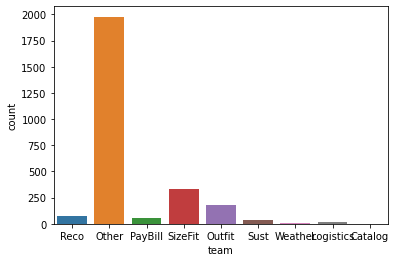

In [27]:
sns.countplot(data=teams, x='team')